# ch2. 퍼셉트론

* 퍼셉트론 알고리즘 : 퍼셉트론은 신경망의 기원이 되는 알고리즘이다. 퍼셉트론의 구조를 배우는 것은 신경망과 딥러닝으로 나아가기 위해 중요하다.

## 2.1 퍼셉트론이란?

퍼셉트론(Perceptron)은 다수의 신호를 입력으로 받아, 하나의 신호를 출력한다.

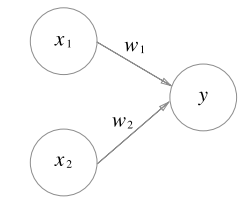

<입력이 2개인 퍼셉트론>


In [22]:
from IPython.display import Image
img = Image("C:/Users/kyw97/Pictures/Screenshots/스크린샷 2023-03-19 203249.png")
display(img)

print("<입력이 2개인 퍼셉트론>")

x1과 x2는 입력신호, y는 출력신호이다.

w1과 w2는 weight(가중치)을 뜻한다.

그림의 원을 뉴런 또는 node라고 부르는데, 신호들이 뉴런에 전해질 때 각각의 고유한 가중치가 곱해진다.

* 가중치 : 해당 신호가 결과에 영향을 미치는 정도, 중요도

뉴런에서 보내온 신호의 총합이 임계값(theta)을 넘을 때, 1을 출력한다. (뉴런이 활성화된다라고 표현)

## 2.2 단순한 논리 회로

### 2.2.1 AND 게이트

AND게이트는 두 입력이 모두 1일 때만 1을 출력하고, 그 외에는 0을 출력한다.

AND 게이트를 퍼셉트론으로 표현하고 싶다면, w1과 w2, theta를 설정하면 된다.

### 2.2.2 NAND 게이트와 OR 게이트

NAND 게이트는 Not And 게이트이다. 다시 말해, AND 게이트의 출력을 뒤집은 것이다.

두 출력이 모두 1일 때만 0을 출력하고, 그 외에는 1을 출력한다.

OR 게이트는 두 입력신호 중 단 하나라도 1이면 1을 출력하고, 그 외에는 0을 출력한다. 

-> 퍼셉트론으로 AND, NAND, OR 게이트를 표현할 수 있고, 퍼셉트론의 구조는 세 게이트에서 모두 동일하다. 단지 매개변수(가중치, theta임계값)만 달라짐.

## 2.3 퍼셉트론 구현하기

### 2.3.1 간단한 구현부터

In [43]:
def AND(x1, x2):
    w1, w2, theta = 0.5, 0.5, 0.7
    
    tmp = w1*x1 + w2*x2
    
    if tmp <= theta:
        return 0
    elif tmp > theta:
        return 1

In [44]:
print(AND(0,0))
print(AND(1,0))
print(AND(0,1))
print(AND(1,1))

0
0
0
1


### 2.3.2 가중치와 편향 도입

퍼셉트론 식의 theta(임계값)을 -b로 치환한다.

입력신호에 각각의 가중치를 곱한 값의 합에 b를 더한 값이 0을 넘으면 1을 출력, 그렇지 않으면 0을 출력한다.

In [45]:
import numpy as np

In [50]:
x = np.array([0,1])
w = np.array([0.5, 0.5])
b = -0.7

np.sum(w*x) + b

-0.19999999999999996

### 2.3.3 가중치와 편향 구하기

가중치와 편향을 도입한 AND 게이트를 구현해보자.

In [80]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    
    s = sum(x*w) + b
    
    if s > 0:
        return 1
    else:
        return 0

In [81]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    
    tmp = np.sum(w*x) + b
    
    if tmp > 0:
        return 1
    else:
        return 0

In [82]:
def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    
    tmp = np.sum(w*x) + b
    
    if tmp > 0:
        return 1
    else:
        return 0

* 가중치 : 입력신호들이 결과에 영향을 미치는 정도, 중요도
* 편향 : 뉴런이 얼마나 쉽게 활성화될 수 있는지를 나타내는 지표

## 2.4 퍼셉트론의 한계

### 2.4.1 XOR 게이트

XOR 게이트의 영역을 하나의 직선으로 나타내는 것은 불가능하다!

### 2.4.2 선형과 비선형

퍼셉트론은 w1*x1 + w2*x2 등의 형태로 표현되기 때문에, 항상 *직선*의 형태로 표현된다는 한계가 있다.

* 선형: 직선
* 비선형 : 곡선

## 2.5 다층 퍼셉트론이 출동한다면

* 다층 퍼셉트론(multi-layer perceptron) : '단층' 퍼셉트론으로는 XOR 게이트를 분류할 수 없지만, '다층' 퍼셉트론으로는 XOR 게이트를 분류할 수 있다.

### 2.5.1 기존 게이트 조합하기

NAND 게이트와 OR 게이트의 출력을 AND 게이트의 입력으로 받으면, XOR 게이트를 구현할 수 있다.

### 2.5.2 XOR 게이트 구현하기

In [83]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    
    return y

In [89]:
print(XOR(1,1))
print(XOR(1,0))
print(XOR(0,1))
print(XOR(0,0))

0
1
1
0


XOR 게이트를 표현하는 퍼셉트론(2층 퍼셉트론)은 multi-layer 퍼셉트론이다.

-> single-layer로 표현하지 못한 것을 층을 늘려 multi-layer로 표현할 수 있다.

* 다층 퍼셉트론 : 층이 여러 개인 퍼셉트론

## 2.6 NAND에서 컴퓨터까지

## 2.7 정리

퍼셉트론은 ..
1. input과 output이 있는 알고리즘
2. 매개변수로 가중치(weight)과 편향(bias)를 가진다.
3. AND, NAND, OR 게이트(직선영역으로 분류)를 표현할 수 있다.
4. 하지만 XOR 게이트는 표현할 수 없다. (XOR 게이트는 비선형으로 분류해야하기 때문에)

   -> 2층 퍼셉트론을 이용하면, XOR 게이트를 표현할 수 있다.
5. 단층 퍼셉트론은 직선형 영역을 표현, multi-layer는 비선형역역도 표현할 수 있다.
6. multi-layer 퍼셉트론으로 컴퓨터도 표현할 수 있다.


In [ ]:
김예원 2장 완료했습니다. 3/19